# Mettre en place notre environnement
________

La première chose que nous devons faire est de charger les bibliothèques et les ensembles de données que nous allons utiliser. Pour aujourd'hui, nous allons travailler avec deux ensembles de données : un contenant des chroniques de température dans le lit de la rivière (zone hyporhéique), et un autre contenant des les chroniques de différence de charge enregistré en **Volt**.

**Important!** Assurez-vous d'exécuter cette cellule vous-même ou le reste de votre code ne fonctionnera pas

In [32]:
/# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# C:\Users\guill\Dropbox\Ingenieur_civil_Mines\MOLONARI\MOLONARI_1D_RESOURCES
# read in our data
capteur_riviere = pd.read_csv("../documents/molonari/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_P_measures.csv")
capteur_ZH = pd.read_csv("../documents/molonari/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_T_measures.csv")
etalonage_capteur_riv = pd.read_csv("../documents/molonari/MOLONARI_1D_RESOURCES/configuration/pressure_sensors\P508.csv")

# set seed for reproducibility
np.random.seed(0)

Nous sommes maintenant prêts à examiner quelques dates ! (Si vous le souhaitez, vous pouvez profiter de cette occasion pour jeter un coup d'œil à certaines des données).

# Imprimez le noms des colonnes
renommer les colonnes du fichier capteur_riviere :  	dates,tension_V,temperature_stream_C et celles du fichier capteur_ZH  :
#,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C



# Transformez les données de différence de charge en mètres



In [33]:
cap2 = capteur_ZH.reset_index().drop([0])
capteur_ZH = cap2.drop(columns=[cap2.columns[6],cap2.columns[7],cap2.columns[8]],axis=1).rename({'level_0':'#','level_1':'dates','level_2':'temperature_depth_1_C','level_3':'temperature_depth_2_C','level_4':'temperature_depth_3_C','level_5':'temperature_depth_4_C'},axis=1)
capteur_ZH

,#,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C
1,1,06/27/16 12:00:00 PM,13.810,13.834,13.858,13.810
2,2,06/27/16 12:15:00 PM,13.834,13.858,13.882,13.834
3,3,06/27/16 12:30:00 PM,13.930,13.954,14.050,14.002
4,4,06/27/16 12:45:00 PM,13.882,13.954,14.026,13.954
5,5,06/27/16 01:00:00 PM,13.858,13.930,14.026,13.954
...,...,...,...,...,...,...
1434,1434,07/12/16 10:15:00 AM,14.457,14.697,14.792,14.649
1435,1435,07/12/16 10:30:00 AM,15.008,14.792,14.816,14.649
1436,1436,07/12/16 10:45:00 AM,17.320,17.296,17.034,17.130
1437,1437,07/12/16 10:49:31 AM,NaN,NaN,NaN,NaN


In [8]:
capteur_riviere =capteur_riviere.drop(columns = [capteur_riviere.columns[0],capteur_riviere.columns[4],capteur_riviere.columns[5],capteur_riviere.columns[6]],axis=1)
capteur_riviere2

,Unnamed: 1,Unnamed: 2,Unnamed: 3
1,06/27/16 12:00:00 PM,1.26787,18.342
2,06/27/16 12:15:00 PM,1.0663,13.898
3,06/27/16 12:30:00 PM,1.20661,13.915
4,06/27/16 12:45:00 PM,1.24533,13.939
5,06/27/16 01:00:00 PM,1.24437,13.967
...,...,...,...
1456,07/12/2016 15:45,1.13668,9.126
1457,07/12/2016 16:00,1.33513,9.157
1458,07/12/2016 16:15,1.38926,9.199
1459,07/12/2016 16:30,1.41386,9.244


In [728]:
alpha = -1.462495
beta = 0.001474
intercept = 1.210344

In [729]:
capteur_riviere = capteur_riviere.rename({'tension_V':'charge_diff'},axis=1)
capteur_riviere.head()

,dates,charge_diff,temperature_stream_C
1,06/27/16 12:00:00 PM,1.26787,18.342
2,06/27/16 12:15:00 PM,1.0663,13.898
3,06/27/16 12:30:00 PM,1.20661,13.915
4,06/27/16 12:45:00 PM,1.24533,13.939
5,06/27/16 01:00:00 PM,1.24437,13.967


In [730]:
capteur_riviere=capteur_riviere.assign(charge_diff=(capteur_riviere['charge_diff'].astype(float)-intercept)/alpha-capteur_riviere['temperature_stream_C'].astype(float)*beta)

In [731]:
capteur_riviere.head()

,dates,charge_diff,temperature_stream_C
1,06/27/16 12:00:00 PM,-0.066370,18.342
2,06/27/16 12:15:00 PM,0.078006,13.898
3,06/27/16 12:30:00 PM,-0.017958,13.915
4,06/27/16 12:45:00 PM,-0.044468,13.939
5,06/27/16 01:00:00 PM,-0.043853,13.967


# Traitement des dates
## Vérifiez le type de données de notre colonne de date
___

Imprimer les dates des deux fichiers

In [732]:
capteur_riviere[["dates"]]

,dates
1,06/27/16 12:00:00 PM
2,06/27/16 12:15:00 PM
3,06/27/16 12:30:00 PM
4,06/27/16 12:45:00 PM
5,06/27/16 01:00:00 PM
...,...
1456,07/12/2016 15:45
1457,07/12/2016 16:00
1458,07/12/2016 16:15
1459,07/12/2016 16:30


In [733]:
capteur_ZH[["dates"]]

,dates
1,06/27/16 12:00:00 PM
2,06/27/16 12:15:00 PM
3,06/27/16 12:30:00 PM
4,06/27/16 12:45:00 PM
5,06/27/16 01:00:00 PM
...,...
1434,07/12/16 10:15:00 AM
1435,07/12/16 10:30:00 AM
1436,07/12/16 10:45:00 AM
1437,07/12/16 10:49:31 AM


Remarquez qu'en bas de la sortie de `head()`, vous pouvez voir qu'il est dit que le type de données de cette colonne est "object". 

> Pandas utilise le dtype "object" pour stocker différents types de données, mais le plus souvent, lorsque vous voyez une colonne avec le dtype "object", elle contient des chaînes de caractères. 

Si vous consultez la documentation sur le dtype de Pandas [ici] (http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), vous remarquerez qu'il existe également un dtype spécifique `datetime64`. Comme le dtype de notre colonne est `object` plutôt que `datetime64`, nous pouvons dire que Python ne sait pas que cette colonne contient des dates.

Nous pouvons aussi regarder uniquement le dtype de votre colonne sans imprimer les premières lignes si nous le souhaitons :

In [734]:
# check the data type of our date column
capteur_ZH[["dates"]]

,dates
1,06/27/16 12:00:00 PM
2,06/27/16 12:15:00 PM
3,06/27/16 12:30:00 PM
4,06/27/16 12:45:00 PM
5,06/27/16 01:00:00 PM
...,...
1434,07/12/16 10:15:00 AM
1435,07/12/16 10:30:00 AM
1436,07/12/16 10:45:00 AM
1437,07/12/16 10:49:31 AM


In [735]:
capteur_ZH.dtypes

#                        object
dates                    object
temperature_depth_1_C    object
temperature_depth_2_C    object
temperature_depth_3_C    object
temperature_depth_4_C    object
dtype: object

You may have to check the [numpy documentation](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind) to match the letter code to the dtype of the object. "O" is the code for "object", so we can see that these two methods give us the same information.

## Convertir nos colonnes de date en datetime
___

Maintenant que nous savons que notre colonne de date n'est pas reconnue comme une date, il est temps de la convertir pour qu'elle soit reconnue comme une date. Cette opération est appelée "analyse syntaxique des dates" car nous prenons une chaîne de caractères et identifions ses composants. Nous allons utiliser la fonction pd.to_datetime.

Nous pouvons indiquer à pandas le format de nos dates à l'aide d'un guide appelé ["strftime directive", sur lequel vous trouverez plus d'informations à ce lien] (http://strftime.org/). L'idée de base est que vous devez indiquer quelles parties de la date se trouvent où et quelle ponctuation se trouve entre elles. Il existe [de nombreuses parties possibles d'une date](http://strftime.org/), mais les plus courantes sont `%d` pour le jour, `%m` pour le mois, `%y` pour une année à deux chiffres et `%Y` pour une année à quatre chiffres.

Quelques exemples :

 * Le 17 janvier 2007 a le format "%m/%d/%y".
 * 17-1-2007 a le format "%d-%m-%Y".
 

In [736]:
capteur_riviere['dates'] = pd.to_datetime(capteur_riviere['dates'], infer_datetime_format=True)
capteur_ZH['dates'] = pd.to_datetime(capteur_ZH['dates'], infer_datetime_format=True)

In [737]:
capteur_riviere.head()

,dates,charge_diff,temperature_stream_C
1,2016-06-27 12:00:00,-0.066370,18.342
2,2016-06-27 12:15:00,0.078006,13.898
3,2016-06-27 12:30:00,-0.017958,13.915
4,2016-06-27 12:45:00,-0.044468,13.939
5,2016-06-27 13:00:00,-0.043853,13.967


In [738]:
capteur_riviere.dtypes

dates                   datetime64[ns]
charge_diff                    float64
temperature_stream_C            object
dtype: object

In [739]:
capteur_ZH.dtypes

#                                object
dates                    datetime64[ns]
temperature_depth_1_C            object
temperature_depth_2_C            object
temperature_depth_3_C            object
temperature_depth_4_C            object
dtype: object

Maintenant que nos dates sont analysées correctement, nous pouvons travailler avec celles-ci.

___
* Bien que nous spécifions le format de la date ici, il arrive parfois que vous rencontriez une erreur lorsque plusieurs formats de date sont présents dans une même colonne. Dans ce cas, vous pouvez demander à pandas de déduire le bon format de date. Vous pouvez le faire comme suit :

`capteur_riviere['date'] = pd.to_datetime(capteur_riviere['date'], infer_datetime_format=True)``

**Pourquoi ne pas toujours utiliser `infer_datetime_format = True?`** Il y a deux grandes raisons de ne pas toujours faire deviner à pandas le format de l'heure. La première est que pandas n'est toujours capable de trouver le bon format de date, surtout si quelqu'un a fait preuve de créativité dans la saisie des données. La seconde est que c'est beaucoup plus lent que de spécifier le format exact des dates.
____

## Tracer le jour du mois pour vérifier l'analyse de la date
___

L'un des plus grands dangers de l'analyse des dates est de mélanger les mois et les jours. La fonction to_datetime() a des messages d'erreur très utiles, mais il n'est pas inutile de vérifier que les jours du mois que nous avons extraits ont un sens. 

Pour ce faire, nous allons tracer un histogramme des jours du mois. Nous nous attendons à ce qu'il ait des valeurs entre 1 et 31 et, puisqu'il n'y a aucune raison de supposer que les glissements de terrain sont plus fréquents certains jours du mois que d'autres, une distribution relativement égale. (Avec un creux sur 31 car tous les mois n'ont pas 31 jours.) 

<AxesSubplot:>

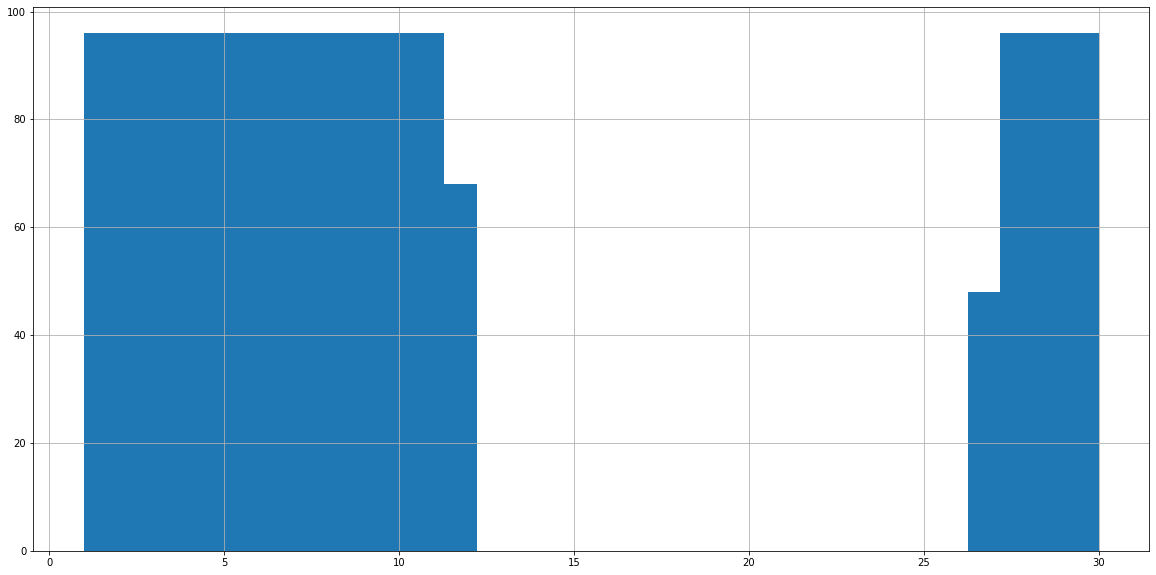

In [740]:
capteur_riviere['dates'].dt.day.hist(bins=31)

<AxesSubplot:>

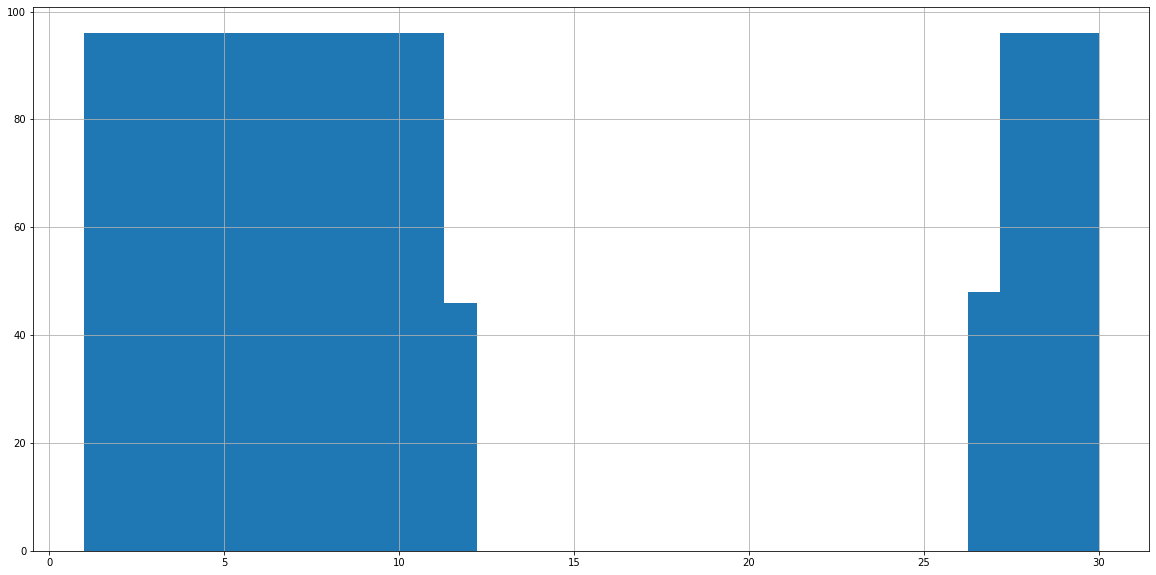

In [741]:
capteur_ZH['dates'].dt.day.hist(bins=31)

# Valeurs aberrantes

L'un des plus grands défis du nettoyage des données est l'identification et le traitement des valeurs aberrantes. En termes simples, les valeurs aberrantes sont des observations qui sont significativement différentes des autres points de données. Même les meilleurs algorithmes d'estimation des paramètres automatique seront moins performants si les observations aberrantes ne sont pas nettoyées des données, car elles impliquent des simulations obsolètes des variables.



In [742]:
capteur_riviere['temperature_stream_C'] = capteur_riviere['temperature_stream_C'].astype(float)
capteur_ZH['temperature_depth_1_C'] = capteur_ZH['temperature_depth_1_C'].astype(float)
capteur_ZH['temperature_depth_2_C'] = capteur_ZH['temperature_depth_2_C'].astype(float)
capteur_ZH['temperature_depth_3_C'] = capteur_ZH['temperature_depth_3_C'].astype(float)
capteur_ZH['temperature_depth_4_C'] = capteur_ZH['temperature_depth_4_C'].astype(float)

In [743]:
print(capteur_riviere.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   dates                 1460 non-null   datetime64[ns]
 1   charge_diff           1460 non-null   float64       
 2   temperature_stream_C  1460 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 45.6 KB
None


## Identification des valeurs aberrantes

La présence de valeurs aberrantes dans les données peut avoir de nombreuses raisons. Parfois, les valeurs aberrantes peuvent être authentiques, alors que dans d'autres cas, elles peuvent être dues à des erreurs de saisie de données. Il est important de comprendre les raisons des valeurs aberrantes avant de les nettoyer.

Nous allons commencer le processus de recherche des valeurs aberrantes en exécutant les statistiques sommaires sur les variables. Pour ce faire, nous utilisons la fonction describe() ci-dessous, qui fournit un résumé statistique de toutes les variables quantitatives.




## Tracez les graphiques de distribution pour les différentes variables

In [744]:
capteur_riviere.describe

<bound method NDFrame.describe of                    dates  charge_diff  temperature_stream_C
1    2016-06-27 12:00:00    -0.066370                18.342
2    2016-06-27 12:15:00     0.078006                13.898
3    2016-06-27 12:30:00    -0.017958                13.915
4    2016-06-27 12:45:00    -0.044468                13.939
5    2016-06-27 13:00:00    -0.043853                13.967
...                  ...          ...                   ...
1456 2016-07-12 15:45:00     0.036917                 9.126
1457 2016-07-12 16:00:00    -0.098821                 9.157
1458 2016-07-12 16:15:00    -0.135895                 9.199
1459 2016-07-12 16:30:00    -0.152782                 9.244
1460 2016-07-12 16:45:00    -0.162478                 9.290

[1460 rows x 3 columns]>

#### 1. Box plot

Le box plot est une manière standardisée d'afficher la distribution des données sur la base du résumé en cinq chiffres (minimum, premier quartile (Q1), médiane, troisième quartile (Q3) et maximum). Elle est souvent utilisée pour identifier la distribution des données et détecter les valeurs aberrantes. La ligne de code ci-dessous trace le box plot de la variable numérique 'Loan_amount'. 

<AxesSubplot:>

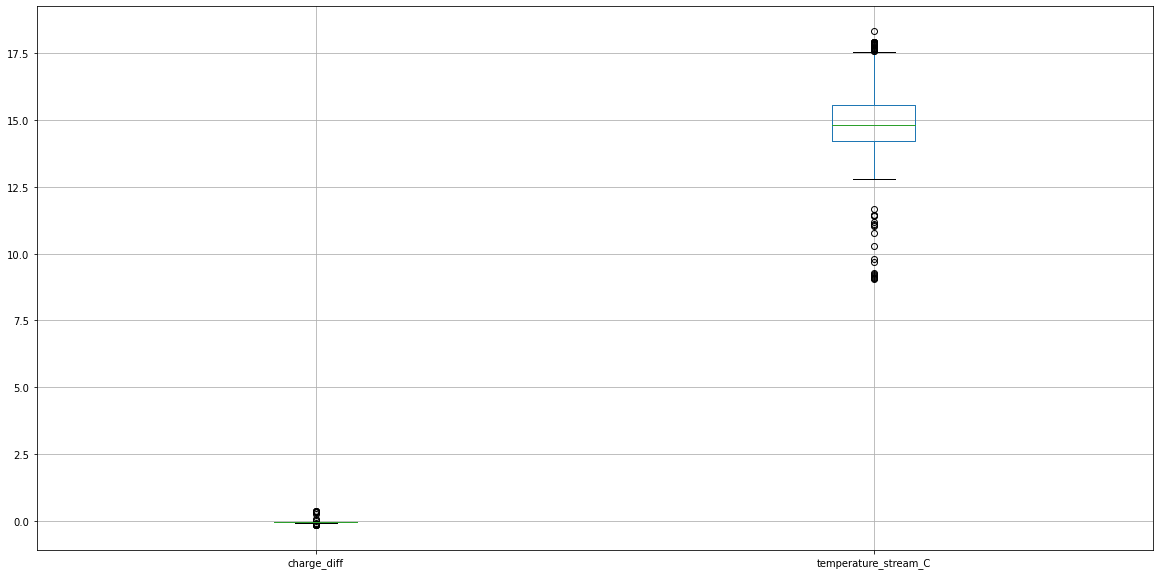

In [745]:
capteur_riviere.boxplot()

<AxesSubplot:>

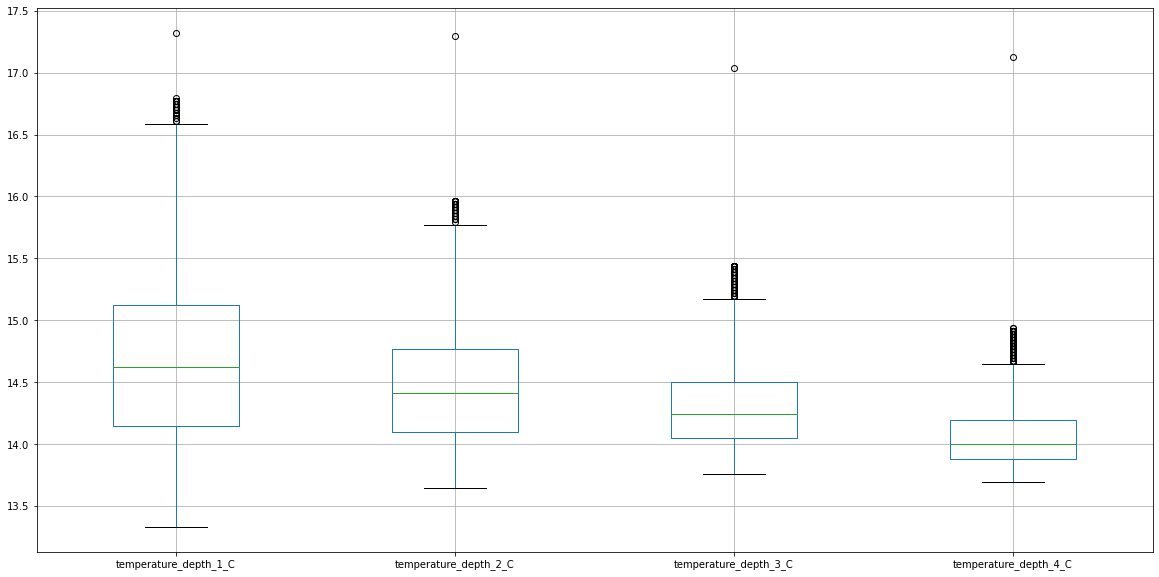

In [746]:
capteur_ZH.boxplot()

## 2. Histogramme

Un histogramme est utilisé pour visualiser la distribution d'une variable numérique. Une valeur aberrante apparaît en dehors du modèle général de distribution. La ligne de code ci-dessous trace un histogramme de la variable 'Revenu', en utilisant la fonction hist(). A histogram is used to visualize the distribution of a numerical variable. An outlier will appear outside the overall pattern of distribution. The line of code below plots a histogram of the 'Income' variable, using the hist() function. 

Text(0.5, 1.0, 'Histogramme de temperature_stream_C')

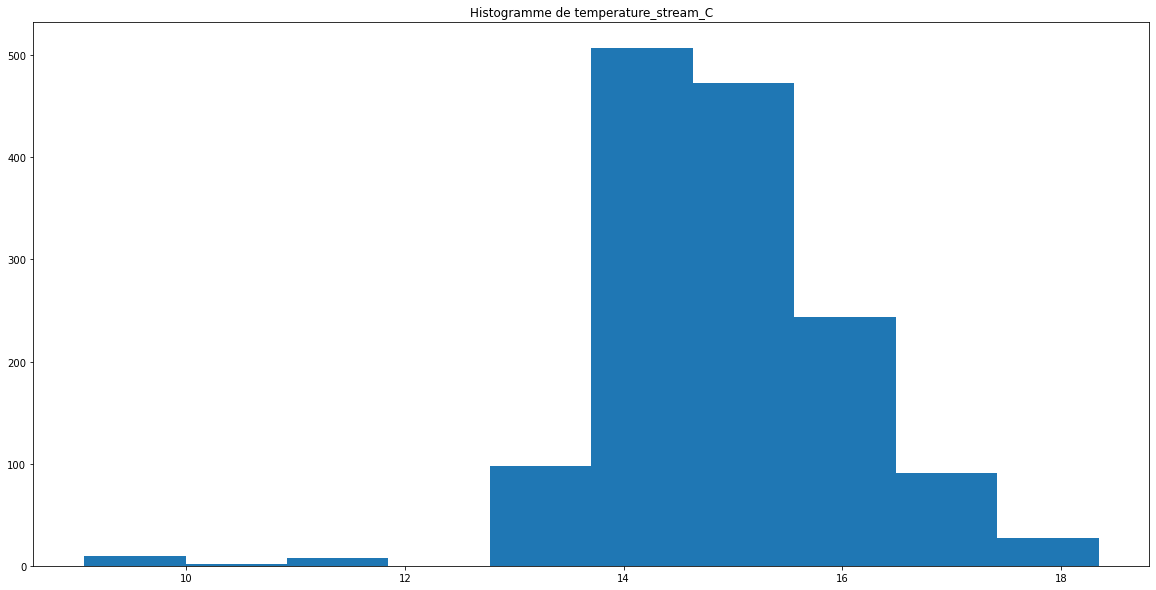

In [747]:
plt.hist(capteur_riviere['temperature_stream_C'])
plt.title('Histogramme de temperature_stream_C')

Text(0.5, 1.0, 'Histogramme de charge_diff')

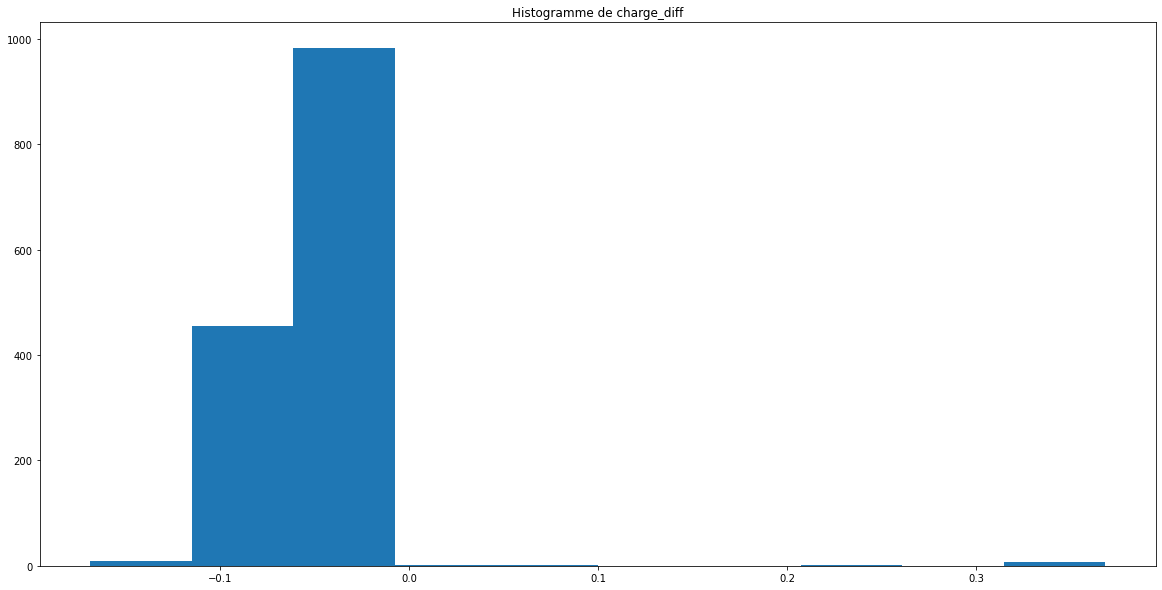

In [748]:
plt.hist(capteur_riviere['charge_diff'])
plt.title('Histogramme de charge_diff')

Text(0.5, 1.0, 'Histogramme de la température du capteur ZH à la profondeur 1')

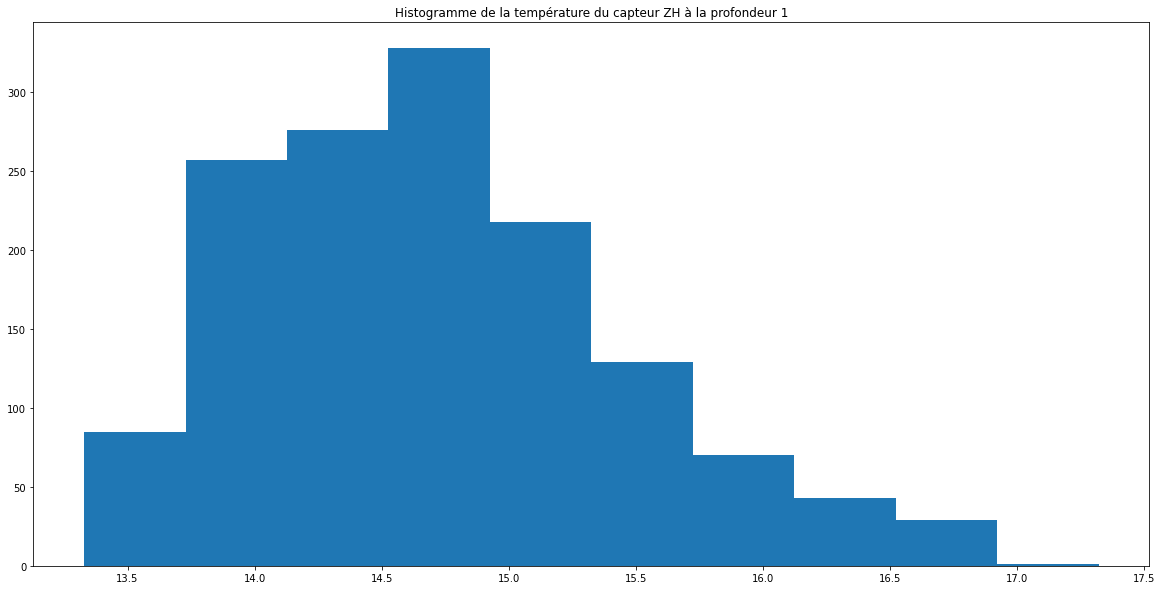

In [749]:
plt.hist(capteur_ZH['temperature_depth_1_C'])
plt.title('Histogramme de la température du capteur ZH à la profondeur 1')

Text(0.5, 1.0, 'Histogramme de la température du capteur ZH à la profondeur 2')

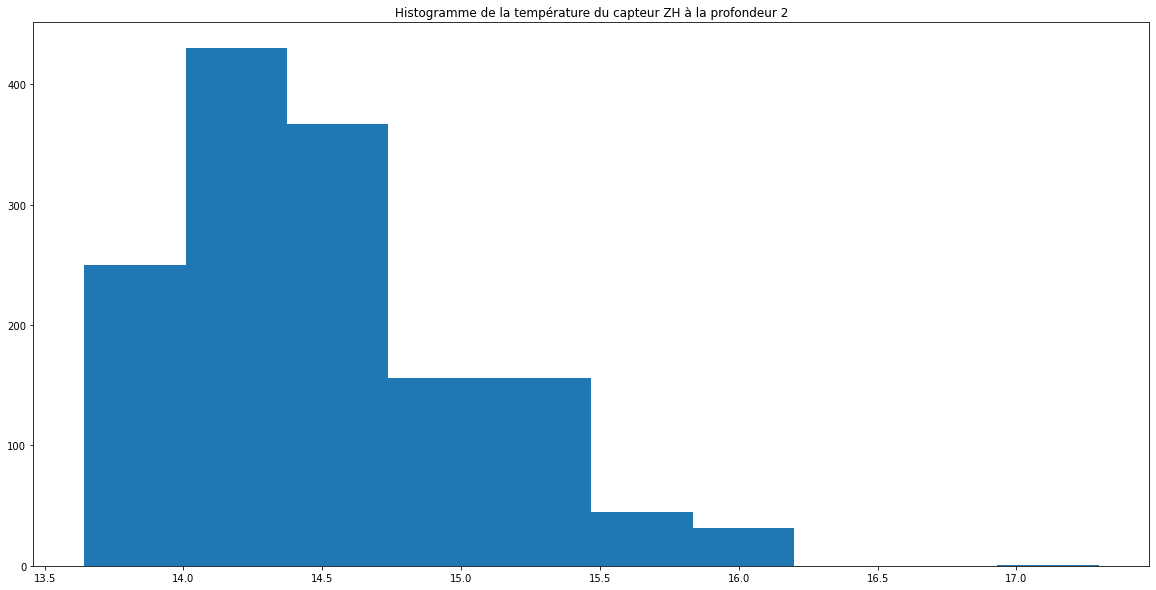

In [750]:
plt.hist(capteur_ZH['temperature_depth_2_C'])
plt.title('Histogramme de la température du capteur ZH à la profondeur 2')

Text(0.5, 1.0, 'Histogramme de la température du capteur ZH à la profondeur 3')

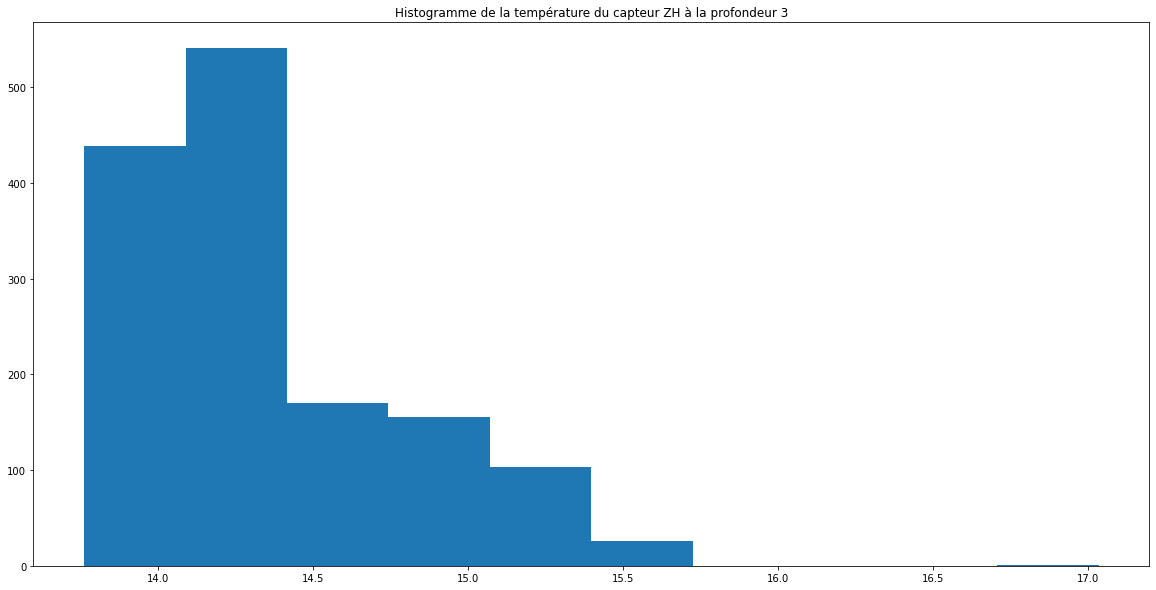

In [751]:
plt.hist(capteur_ZH['temperature_depth_3_C'])
plt.title('Histogramme de la température du capteur ZH à la profondeur 3')

Text(0.5, 1.0, 'Histogramme de la température du capteur ZH à la profondeur 4')

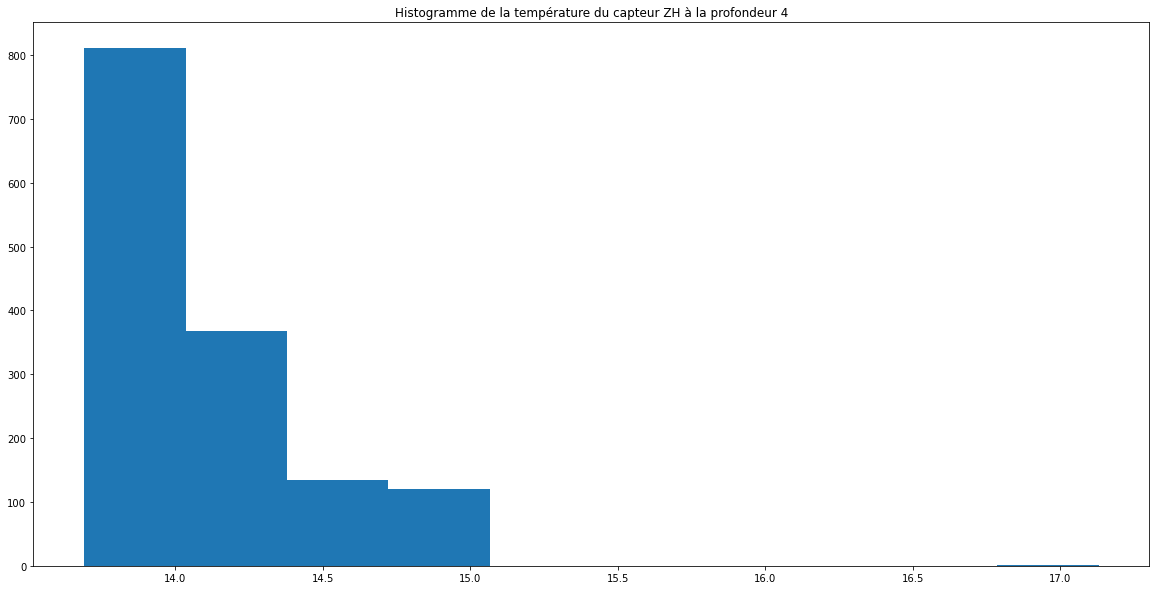

In [752]:
plt.hist(capteur_ZH['temperature_depth_4_C'])
plt.title('Histogramme de la température du capteur ZH à la profondeur 4')

## 3. Scatterplot

Un nuage de points permet de visualiser la relation entre deux variables quantitatives. Les données sont affichées sous la forme d'une collection de points, et tout point qui ne correspond pas au regroupement général des deux variables peut indiquer des valeurs aberrantes. 

génèrez un nuage de points entre les différentes variables de températures. 



Text(0, 0.5, 'Temperature (en °C)')

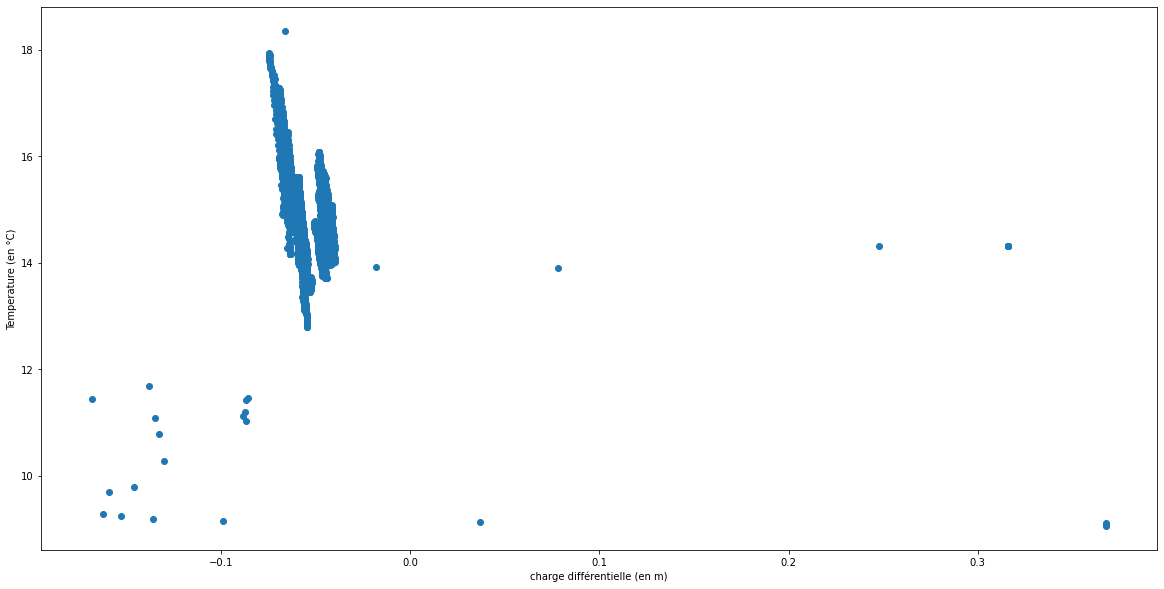

In [753]:
plt.scatter(capteur_riviere['charge_diff'],capteur_riviere['temperature_stream_C'])
plt.xlabel('charge différentielle (en m)')
plt.ylabel('Temperature (en °C)')

## Identification des valeurs aberrantes avec l'écart interquartile (IQR)

L'écart interquartile (IQR) est une mesure de la dispersion statistique et est calculé comme la différence entre les 75e et 25e percentiles. Il est représenté par la formule IQR = Q3 - Q1. Les  lignes de code ci-dessous calculent et impriment l'écart interquartile pour chacune des variables de l'ensemble de données.  La règle générale est que tout ce qui n'est pas dans la plage de (Q1 - 1,5 IQR) et (Q3 + 1,5 IQR) est une valeur aberrante et peut être supprimé.


### Fonctions d'assistance

Ecrire des fonctions afin d'examiner chaque colonne des deux fichiers de données de terain et de calculer les 1er et 3e quartiles, l'intervalle inter-quartile et le minimum et le maximum. Toute valeur en dehors du minimum et du maximum est une valeur aberrante.

In [40]:
def assistance(df,nom_colonne,coef):#on introduit l'argument coef pour pouvoir utiliser la méthode IQR avec une place [Q1-coef*IQR;Q3+coef*IQR] avec coef!=1.5 sion le souhaite
    q1 = df[nom_colonne].quantile(0.25)
    q3 = df[nom_colonne].quantile(0.75)
    iqr = q3-q1
    minimum = q1 - coef*iqr
    maximum = q3 + coef*iqr
    return minimum,maximum

### Résolution de la distribution asymétrique…

A partir de nos données dans un histogramme, nous pouvons obtenir une distribution asymétrique des données. Une seule grande barre avec de minuscules barres à gauche ou à droite (ou les deux) est un signe révélateur que des valeurs aberrantes peuvent être présentes dans les données et cela signifie que notre bel histogramme, bien rangé et normalement distribué, est complètement caché et obscurci par le seul grand bar.


Lorsque nous observons ce modèle, nous devons supprimer les valeurs aberrantes, puis voir à quoi ressemble la nouvelle distribution. Si nous voulons vérifier la présence de valeurs aberrantes, une boîte à moustaches rapide confirmera ou refusera…

## Suppression des valeurs aberrantes et visualisation du résultat

Après avoir fait tout le gros du travail dans les fonctions d'assistance, nous pouvons maintenant supprimer les lignes des données qui contiennent des valeurs aberrantes en dehors de | - et - | moustaches…



In [755]:
bornes_charge_diff = assistance(capteur_riviere,'charge_diff',1.5)
bornes_temperature = assistance(capteur_riviere,'temperature_stream_C',1.5)

In [756]:
index = capteur_riviere.index
capteur_riviere2=capteur_riviere.drop(index[(capteur_riviere['charge_diff']<bornes_charge_diff[0])|(capteur_riviere['charge_diff']>bornes_charge_diff[1])|(capteur_riviere['temperature_stream_C']<bornes_temperature[0])|(capteur_riviere['temperature_stream_C']>bornes_temperature[1])])
#on supprime les observations qui ont une valeur de charge differentielle ou de temperature qui est soit
#inférieure au minimum soit supérieure au maximum

In [757]:
capteur_riviere2

,dates,charge_diff,temperature_stream_C
4,2016-06-27 12:45:00,-0.044468,13.939
5,2016-06-27 13:00:00,-0.043853,13.967
6,2016-06-27 13:15:00,-0.041610,13.985
7,2016-06-27 13:30:00,-0.040623,14.021
8,2016-06-27 13:45:00,-0.040007,14.062
...,...,...,...
1430,2016-07-12 09:15:00,-0.063417,14.214
1431,2016-07-12 09:30:00,-0.063711,14.237
1432,2016-07-12 09:45:00,-0.063478,14.255
1433,2016-07-12 10:00:00,-0.063458,14.279


In [758]:
bornes_temperature_depth_1_C = assistance(capteur_ZH,'temperature_depth_1_C',1.5)
bornes_temperature_depth_2_C = assistance(capteur_ZH,'temperature_depth_2_C',1.5)
bornes_temperature_depth_3_C = assistance(capteur_ZH,'temperature_depth_3_C',1.5)
bornes_temperature_depth_4_C = assistance(capteur_ZH,'temperature_depth_4_C',1.5)

index = capteur_ZH.index
capteur_ZH2 = capteur_ZH.drop(index[(capteur_ZH['temperature_depth_1_C']<bornes_temperature_depth_1_C[0])|(capteur_ZH['temperature_depth_1_C']>bornes_temperature_depth_1_C[1])|(capteur_ZH['temperature_depth_2_C']<bornes_temperature_depth_2_C[0])|(capteur_ZH['temperature_depth_2_C']>bornes_temperature_depth_2_C[1])|(capteur_ZH['temperature_depth_3_C']<bornes_temperature_depth_3_C[0])|(capteur_ZH['temperature_depth_3_C']>bornes_temperature_depth_3_C[1])|(capteur_ZH['temperature_depth_4_C']<bornes_temperature_depth_4_C[0])|(capteur_ZH['temperature_depth_4_C']>bornes_temperature_depth_4_C[1])])

In [759]:
capteur_ZH2

,#,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C
1,1,2016-06-27 12:00:00,13.810,13.834,13.858,13.810
2,2,2016-06-27 12:15:00,13.834,13.858,13.882,13.834
3,3,2016-06-27 12:30:00,13.930,13.954,14.050,14.002
4,4,2016-06-27 12:45:00,13.882,13.954,14.026,13.954
5,5,2016-06-27 13:00:00,13.858,13.930,14.026,13.954
...,...,...,...,...,...,...
1433,1433,2016-07-12 10:00:00,14.457,14.721,14.816,14.649
1434,1434,2016-07-12 10:15:00,14.457,14.697,14.792,14.649
1435,1435,2016-07-12 10:30:00,15.008,14.792,14.816,14.649
1437,1437,2016-07-12 10:49:31,NaN,NaN,NaN,NaN


## Expliquez le résultat
est ce que cette méthodologie vous semble suffisante? Tentez de trouver les limites de cette méthodologie?
Que pouvez vous apportez aux fonctions afin de les améliorer?

<AxesSubplot:>

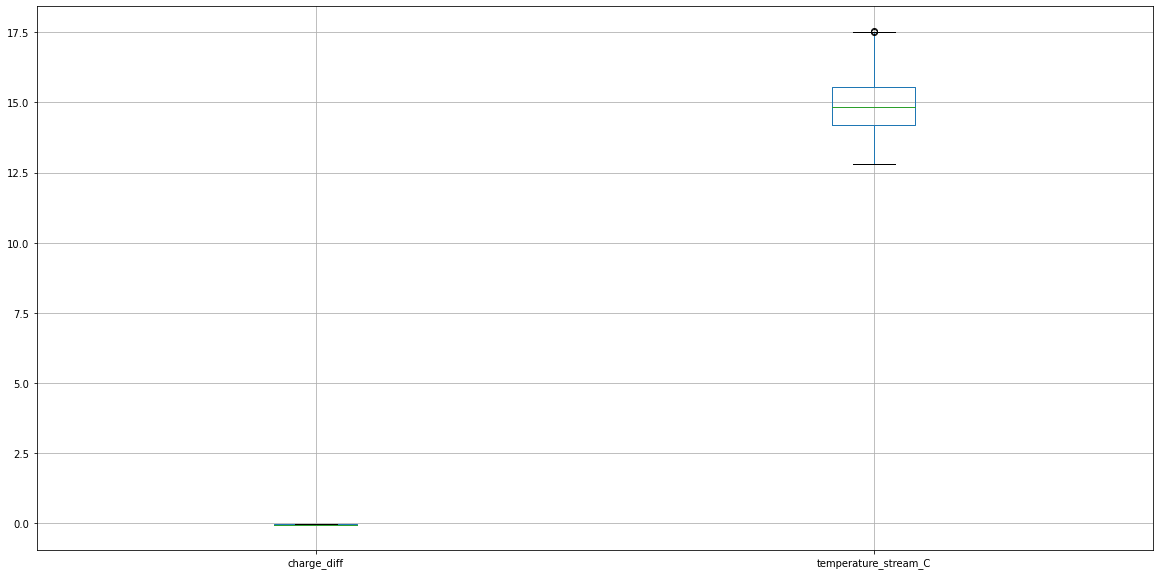

In [760]:
capteur_riviere2.boxplot()

<AxesSubplot:>

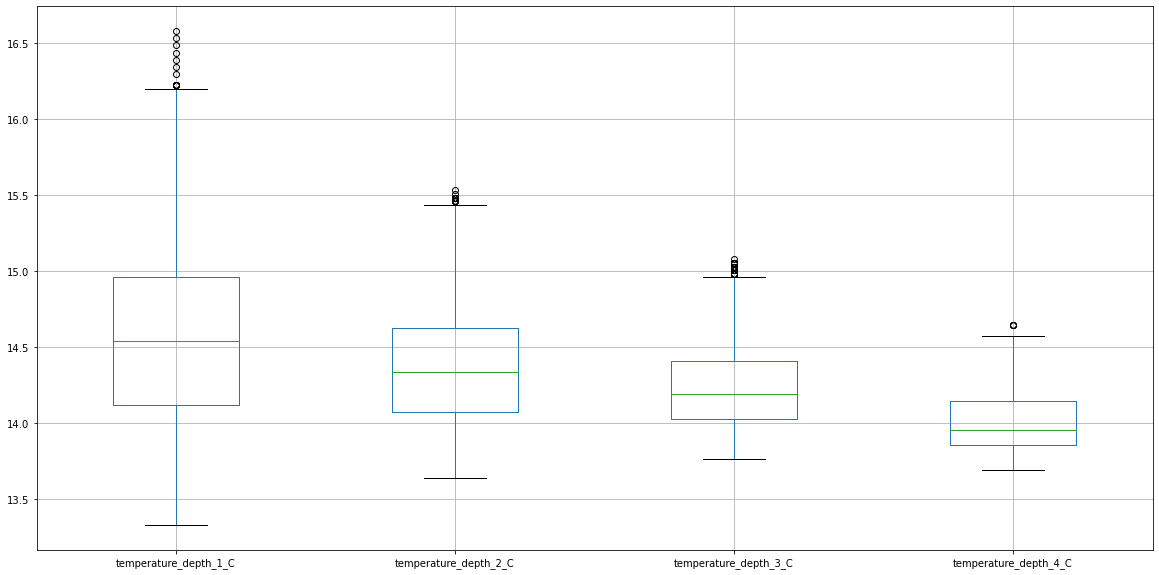

In [761]:
capteur_ZH2.boxplot()

On remarque que la suppression des valeurs aberrantes au sens de l'écart interquartile a permis de supprimer les valeurs aberrantes de charge différentielle et qu'elle a permis de supprimer les valeurs aberrantes de temperature_stream_C à une exception près.
Pour la base de données Capteur_ZH, la suppression des valeurs aberrantes au sens de l'écart interquartile a permis de supprimer les valeurs les plus aberrantes (il y avait un point isolé très aberrant à chaque profondeur; ceux-ci ont disparu). Cependant, un groupe de valeurs aberrantes de température assez nombreux persiste, pour chaque profondeur , pour le capteur ZH.

## Valeurs abérantes avec la méthode score Z 
Il s'agit d'une unité mesurée en écart-type. Fondamentalement, il s'agit d'une mesure de la distance entre le score brut et la moyenne. Il est compris entre -3 et +3, où 0 = moyenne et 1 = écart-type, c'est-à-dire une distribution normale.

Cette méthode suggère qu'en tout point de données il existe une relation entre l'écart-type et la moyenne. Le score Z permet de trouver la distribution des données où la moyenne est égale à 0 et l'écart-type à 1, c'est-à-dire une distribution normale. Vous devez vous demander en quoi cela peut nous aider à identifier les valeurs aberrantes ? En calculant le score Z, nous redimensionnons et centrons les données et recherchons les points de données qui sont trop éloignés de zéro. Ces points de données qui sont trop éloignés de zéro seront traités comme des valeurs aberrantes. Dans la plupart des cas, un seuil de 3 ou -3 est utilisé, c'est-à-dire que si la valeur du score Z est supérieure ou inférieure à 3 ou -3 respectivement, ce point de données sera identifié comme aberrant.

Formule pour le score Z = (Observation - Moyenne)/Écart-type

z = (X - μ) / σ

Ecrire des functions afin de pouvoir appliquer cette méthodologie aux données

In [56]:
def mean_std(df,nom_colonne):
    mean = df[nom_colonne].mean()
    std = df[nom_colonne].std()
    return mean,std

In [766]:
seuil = 3

In [767]:
mean_std_charge_diff = mean_std(capteur_riviere,'charge_diff')
mean_std_temp = mean_std(capteur_riviere,'temperature_stream_C')
indices_aberrants = capteur_riviere[((capteur_riviere['charge_diff']-mean_std_charge_diff[0])/mean_std_charge_diff[1]<-seuil)|((capteur_riviere['charge_diff']-mean_std_charge_diff[0])/mean_std_charge_diff[1]>seuil)|((capteur_riviere['temperature_stream_C']-mean_std_temp[0])/mean_std_temp[1]<-seuil)|((capteur_riviere['temperature_stream_C']-mean_std_temp[0])/mean_std_temp[1]>seuil)].index
capteur_riviere_clean = capteur_riviere.drop(indices_aberrants)
#on retire les observations qui ont un z-score de charge différentielle ou de température inférieur à -3 ou
#supérieur à 3

<AxesSubplot:>

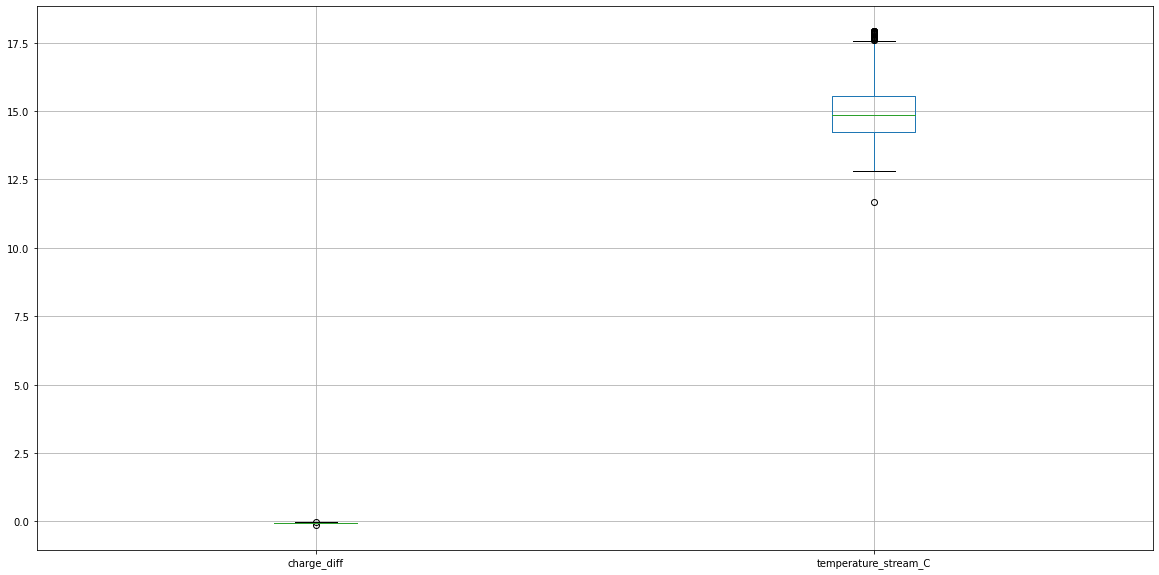

In [768]:
capteur_riviere_clean.boxplot()

In [782]:
seuil = 3

In [783]:
mean_std_1 = mean_std(capteur_ZH,'temperature_depth_1_C')
mean_std_2 = mean_std(capteur_ZH,'temperature_depth_2_C')
mean_std_3 = mean_std(capteur_ZH,'temperature_depth_3_C')
mean_std_4 = mean_std(capteur_ZH,'temperature_depth_4_C')
indices_aberrants = capteur_ZH[((capteur_ZH['temperature_depth_1_C']-mean_std_1[0])/mean_std_1[1]<-seuil)|((capteur_ZH['temperature_depth_1_C']-mean_std_1[0])/mean_std_1[1]>seuil)|((capteur_ZH['temperature_depth_2_C']-mean_std_2[0])/mean_std_2[1]<-seuil)|((capteur_ZH['temperature_depth_2_C']-mean_std_2[0])/mean_std_2[1]>seuil)|((capteur_ZH['temperature_depth_3_C']-mean_std_3[0])/mean_std_3[1]<-seuil)|((capteur_ZH['temperature_depth_3_C']-mean_std_3[0])/mean_std_3[1]>seuil)|((capteur_ZH['temperature_depth_4_C']-mean_std_4[0])/mean_std_4[1]<-seuil)|((capteur_ZH['temperature_depth_4_C']-mean_std_4[0])/mean_std_4[1]>seuil)].index
capteur_ZH_clean = capteur_ZH.drop(indices_aberrants)

<AxesSubplot:>

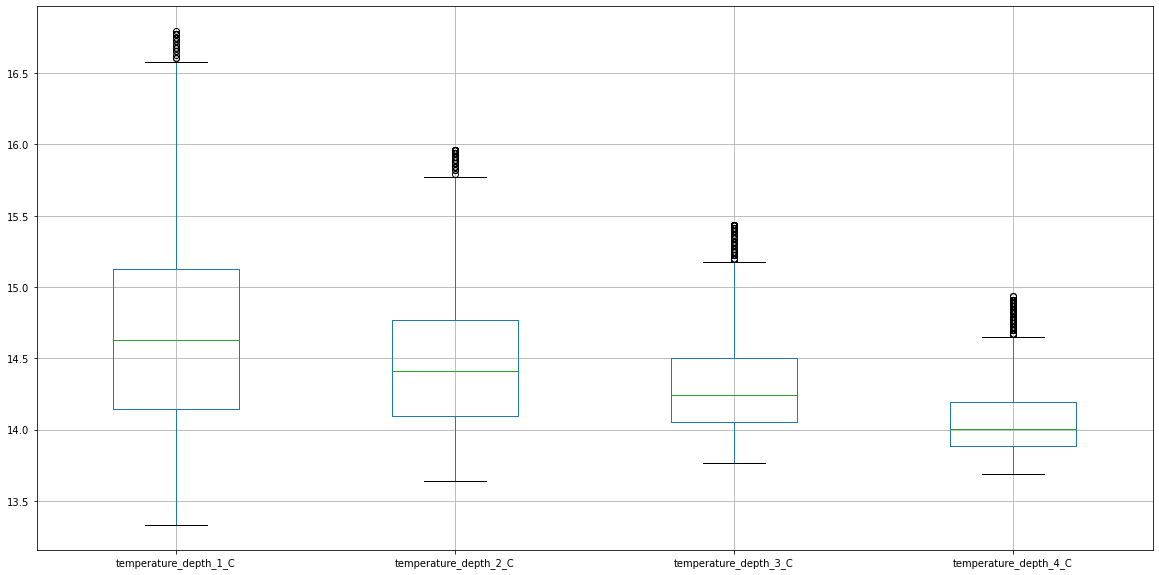

In [784]:
capteur_ZH_clean.boxplot(

## Comparer les deux méthodologies, donner leurs avantages et leurs limitations
Vous pouvez proposer des alternatives.

L'avantage du Z-Score par rapport à l'écart interquartile est qu'il prend en compte à la fois la valeur moyenne de la distribution et sa dispersion (via l'écart-type) tandis que l'écart interquartile prend seulement en compte des inducateurs de dispersion (les quartiles).
La limite du Z-score est qu'il suppose que les données suivent une loi gaussienne. Il perd donc de sa pertinence lorsque la distribution est très différente d'une loi normale/gaussienne. À l'inverse, la méthode utilisant l'écart interquartile est adaptable à tout type de loi de distribution.

## Proposer une fonction permettant d'aller des données brutes jusqu'au premier traitement des données.

N'oubliez pas de permettre à l'utilisateur de pouvoir prendre des décisions et de l'aider à prendre ces décisions
Pensez à indiquer à l'utilisateur si le jeu de données est utilisable, quels sont les capteurs défaillant, quel semble être l'orientation des échanges nappe-rivière, les données de différence de charge semblent t'elles données les mêmes informations que les données du profils de température.

Votre function doit prendre en entrée, les trois fichiers et proposer au fur et à mesure de son dérouler des propositions à l'utilisateur.

### Notre code

Structure de notre code :

(i) traitement_donnees : c'est la fonction qui prend en entrée le fichier d'informations sur le point, le fichier de mesures du capteur de la rivière et le fichier de mesures du capteur de la zone hyporhéique et accompagne l'utilisateur jusqu'au premier traitement de données

(ii) partie2 : une fonction auxiliaire qui traite spécifiquement le nettoyage des données issues du capteur de la zone hyporhéique

(iii) id_defaillant : une fonction auxiliaire qui indique si un capteur est défaillant au vu de la vitesse de variation de température qu'il enregistre

(iv) orientation_echanges : une fonction auxiliaire qui trace l'évolution des différences de charge et indique, pour chaque période, l'orientation des échanges et donc le type de régime (infiltratoire/exfiltratoire)

(v) coherence : une fonction qui vérifie si les données issues de la différence de charge et des profils de température sont cohérentes entre elles


In [150]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
def traitement_donnees(fichier_info,P_measures,T_measures):
    info = pd.read_csv(fichier_info)
    capteur_riviere = pd.read_csv(P_measures,skiprows=1)
    if capteur_riviere[capteur_riviere.columns[0]][0]!=1:
        capteur_riviere = capteur_riviere.reset_index()
    if '46' in T_measures:
        capteur_ZH = pd.read_csv(T_measures, skiprows = 1, sep = '\t')
    else:
        capteur_ZH = pd.read_csv(T_measures, skiprows = 1)
    capteur_riviere = capteur_riviere.rename(columns = {capteur_riviere.columns[0]:'indice',capteur_riviere.columns[1]:'dates', capteur_riviere.columns[2]:'charge_diff',capteur_riviere.columns[3]:'temperature_stream_C'})
    capteur_ZH = capteur_ZH.rename(columns = {capteur_ZH.columns[0]:'indice',capteur_ZH.columns[1]:'dates', capteur_ZH.columns[2]:'temperature_depth_1_C',capteur_ZH.columns[3]:'temperature_depth_2_C',capteur_ZH.columns[4]:'temperature_depth_3_C',capteur_ZH.columns[5]:'temperature_depth_4_C'})
    ref_capteur_P = info[info['Point_Name']=='P_Sensor_Name'].iloc[0,1]
    capteur_P = pd.read_csv("../documents/molonari/MOLONARI_1D_RESOURCES/configuration/pressure_sensors/"+ref_capteur_P+".csv")
    alpha = float(capteur_P[capteur_P['Sensor_Name']=='dU/dH'].iloc[0,1])
    beta = float(capteur_P[capteur_P['Sensor_Name']=='dU/dT'].iloc[0,1])
    intercept = float(capteur_P[capteur_P['Sensor_Name']=='Intercept'].iloc[0,1])
    capteur_riviere = capteur_riviere.assign(charge_diff=(capteur_riviere['charge_diff'].astype(float)-intercept)/alpha-capteur_riviere['temperature_stream_C'].astype(float)*beta)
    ref_shaft = info[info['Point_Name']=='Shaft_Name'].iloc[0,1]
    shaft = pd.read_csv("../documents/molonari/MOLONARI_1D_RESOURCES/configuration/shafts/"+ref_shaft+".csv")
    depths = shaft[shaft['Shaft_Name']=='Sensors_Depth'].iloc[0,1]
    depths = depths.replace(' ','').replace('[','').replace(']','').split(',')
    capteur_riviere['dates'] = pd.to_datetime(capteur_riviere['dates'], infer_datetime_format=True)
    capteur_ZH['dates'] = pd.to_datetime(capteur_ZH['dates'], infer_datetime_format=True)
    capteur_riviere['temperature_stream_C'] = capteur_riviere['temperature_stream_C'].astype(float)
    capteur_ZH['temperature_depth_1_C'] = capteur_ZH['temperature_depth_1_C'].astype(float)
    capteur_ZH['temperature_depth_2_C'] = capteur_ZH['temperature_depth_2_C'].astype(float)
    capteur_ZH['temperature_depth_3_C'] = capteur_ZH['temperature_depth_3_C'].astype(float)
    capteur_ZH['temperature_depth_4_C'] = capteur_ZH['temperature_depth_4_C'].astype(float)
    bornes_charge_diff = assistance(capteur_riviere,'charge_diff',1.5)
    bornes_temperature = assistance(capteur_riviere,'temperature_stream_C',1.5)
    bornes_1 = assistance(capteur_ZH,'temperature_depth_1_C',1.5)
    bornes_2 = assistance(capteur_ZH,'temperature_depth_2_C',1.5)
    bornes_3 = assistance(capteur_ZH,'temperature_depth_3_C',1.5)
    bornes_4 = assistance(capteur_ZH,'temperature_depth_4_C',1.5)
    indices_aberrants_riviere = capteur_riviere[(capteur_riviere['charge_diff']<bornes_charge_diff[0])|(capteur_riviere['charge_diff']>bornes_charge_diff[1])|(capteur_riviere['temperature_stream_C']<bornes_temperature[0])|(capteur_riviere['temperature_stream_C']>bornes_temperature[1])].index
    indices_aberrants_ZH = capteur_ZH[(capteur_ZH['temperature_depth_1_C']<bornes_1[0])|(capteur_ZH['temperature_depth_1_C']>bornes_1[1])|(capteur_ZH['temperature_depth_2_C']<bornes_2[0])|(capteur_ZH['temperature_depth_2_C']>bornes_2[1])|(capteur_ZH['temperature_depth_3_C']<bornes_3[0])|(capteur_ZH['temperature_depth_3_C']>bornes_3[1])|(capteur_ZH['temperature_depth_4_C']<bornes_4[0])|(capteur_ZH['temperature_depth_4_C']>bornes_4[1])].index
    seuil = 3
    print('Capteur rivière :')
    if len(indices_aberrants_riviere) == 0 and len(indices_aberrants_ZH)==0:
        print('''Ce jeu de données est utilisable. En effet, il ne contient pas de valeurs aberrantes au sens de l'écart interquartile avec un coefficient de 1.5''')
        print('Voici ci-dessous la boîte à moustache représentant les données du capteur rivière')
        capteur_riviere[['charge_diff','temperature_stream_C']].boxplot()
        plt.show()
        print('Voici ci-dessous la boîte à moustache représentant les données du capteur ZH')
        capteur_ZH[['temperature_depth_1_C','temperature_depth_2_C','temperature_depth_3_C','temperature_depth_4_C']].boxplot()
        plt.show()
        print('Voici la liste des capteurs défaillants :')
        id_defaillant(capteur_riviere, capteur_ZH,depths)
        print('''Orientation des échanges nappe-rivière au cours du temps:''')
        orientation_echanges(capteur_riviere)
        print('Cohérence entre les données de différence de charge et celles des profils de température')
        coherence(capteur_riviere, capteur_ZH)
    elif len(indices_aberrants_riviere) == 0:
        print('''Le jeu de données du capteur rivière est utilisable en l'état''')
        print('Voici ci-dessous la boîte à moustache représentant les données du capteur rivière')
        capteur_riviere[['charge_diff','temperature_stream_C']].boxplot()
        plt.show()
        partie2(capteur_ZH,capteur_riviere,depths)
    else:
        print('''Ce jeu de données n'est pas utilisable en l'état car il contient des valeurs aberrantes au sens de l'écart interquartile avec un coefficient de 1.5''')
        plt.subplot(311)
        plt.hist(capteur_riviere['charge_diff'])
        plt.title('Histogramme de la charge différentielle')
        plt.subplot(313)
        plt.hist(capteur_riviere['temperature_stream_C'])
        plt.title('Histogramme de la température de la rivière')
        plt.show()
        print("Si la distribution des données est proche d'une gaussienne, nous vous recommandons d'utiliser le score Z. Sinon, utilisez l'écart interquartile")
        btn_scorez = widgets.Button(description= 'Score Z')
        btn_iqr = widgets.Button(description = 'Ecart interquartile')
        display(btn_scorez, btn_iqr)
        def applique_scorez(obj):
            mean_std_charge_diff = mean_std(capteur_riviere,'charge_diff')
            mean_std_temp = mean_std(capteur_riviere,'temperature_stream_C')
            def scatter_riviere_zscore(seuil):
                indices_aberrants = capteur_riviere[((capteur_riviere['charge_diff']-mean_std_charge_diff[0])/mean_std_charge_diff[1]<-seuil)|((capteur_riviere['charge_diff']-mean_std_charge_diff[0])/mean_std_charge_diff[1]>seuil)|((capteur_riviere['temperature_stream_C']-mean_std_temp[0])/mean_std_temp[1]<-seuil)|((capteur_riviere['temperature_stream_C']-mean_std_temp[0])/mean_std_temp[1]>seuil)].index
                n = len(capteur_riviere['charge_diff'])
                colors = ['red' if i in indices_aberrants else 'green' for i in range(n)]
                plt.scatter(capteur_riviere['charge_diff'],capteur_riviere['temperature_stream_C'],c=colors)
                plt.xlabel('charge différentielle (en m)')
                plt.ylabel('Temperature (en °C)')
                plt.show()
            print('Faites varier le seuil et visualisez en temps réel les points qui seraient conservés (en vert) et supprimés (en rouge) en appliquant la méthode du score Z avec le seuil courant')
            w = widgets.interactive(scatter_riviere_zscore, seuil=(0,6,0.1))
            btn = widgets.Button(description='Valider le seuil')
            display(w, btn)
            def drop_aberrants_zscore(obj):
                seuil = w.children[0].value
                indices_aberrants = capteur_riviere[((capteur_riviere['charge_diff']-mean_std_charge_diff[0])/mean_std_charge_diff[1]<-seuil)|((capteur_riviere['charge_diff']-mean_std_charge_diff[0])/mean_std_charge_diff[1]>seuil)|((capteur_riviere['temperature_stream_C']-mean_std_temp[0])/mean_std_temp[1]<-seuil)|((capteur_riviere['temperature_stream_C']-mean_std_temp[0])/mean_std_temp[1]>seuil)].index
                capteur_riviere_clean = capteur_riviere.drop(indices_aberrants)
                capteur_riviere_clean = capteur_riviere_clean.reset_index().drop(['index'],axis=1)
                print('Voici ci-dessous la boîte à moustache représentant les données nettoyées du capteur rivière')
                capteur_riviere_clean[['charge_diff','temperature_stream_C']].boxplot()
                plt.show()
                partie2(capteur_ZH,capteur_riviere_clean,depths)
            btn.on_click(drop_aberrants_zscore)
        def applique_iqr(obj):
            def scatter_riviere_interquartile(coef):
                bornes_charge_diff = assistance(capteur_riviere,'charge_diff',coef)
                bornes_temperature = assistance(capteur_riviere,'temperature_stream_C',coef)
                indices_aberrants = capteur_riviere[(capteur_riviere['charge_diff']<bornes_charge_diff[0])|(capteur_riviere['charge_diff']>bornes_charge_diff[1])|(capteur_riviere['temperature_stream_C']<bornes_temperature[0])|(capteur_riviere['temperature_stream_C']>bornes_temperature[1])].index
                n = len(capteur_riviere['charge_diff'])
                colors = ['red' if i in indices_aberrants else 'green' for i in range(n)]
                plt.scatter(capteur_riviere['charge_diff'],capteur_riviere['temperature_stream_C'],c=colors)
                plt.xlabel('charge différentielle (en m)')
                plt.ylabel('Temperature (en °C)')
                plt.show()
            w = widgets.interactive(scatter_riviere_interquartile, coef=(0,3,0.1))
            print('''Faites varier le seuil et visualisezen temps réel les points qui seraient conservés (en vert) et supprimés (en rouge) en appliquant la méthode de l'écart interquartile avec le coefficient courant''')
            btn = widgets.Button(description='Valider le coefficient')
            display(w, btn)
            def drop_aberrants_interquartile(obj):
                coef = w.children[0].value
                bornes_charge_diff = assistance(capteur_riviere,'charge_diff',coef)
                bornes_temperature = assistance(capteur_riviere,'temperature_stream_C',coef)
                indices_aberrants = capteur_riviere[(capteur_riviere['charge_diff']<bornes_charge_diff[0])|(capteur_riviere['charge_diff']>bornes_charge_diff[1])|(capteur_riviere['temperature_stream_C']<bornes_temperature[0])|(capteur_riviere['temperature_stream_C']>bornes_temperature[1])].index
                capteur_riviere_clean = capteur_riviere.drop(indices_aberrants)
                capteur_riviere_clean = capteur_riviere_clean.reset_index().drop(['index'],axis=1)
                print('Voici ci-dessous la boîte à moustache représentant les données nettoyées du capteur rivière')
                capteur_riviere_clean[['charge_diff','temperature_stream_C']].boxplot()
                plt.show()
                partie2(capteur_ZH,capteur_riviere_clean,depths)
            btn.on_click(drop_aberrants_interquartile)
        btn_scorez.on_click(applique_scorez)
        btn_iqr.on_click(applique_iqr)


In [151]:
def partie2(capteur_ZH,cr,depths):
    bornes_1 = assistance(capteur_ZH,'temperature_depth_1_C',1.5)
    bornes_2 = assistance(capteur_ZH,'temperature_depth_2_C',1.5)
    bornes_3 = assistance(capteur_ZH,'temperature_depth_3_C',1.5)
    bornes_4 = assistance(capteur_ZH,'temperature_depth_4_C',1.5)
    indices_aberrants = capteur_ZH[(capteur_ZH['temperature_depth_1_C']<bornes_1[0])|(capteur_ZH['temperature_depth_1_C']>bornes_1[1])|(capteur_ZH['temperature_depth_2_C']<bornes_2[0])|(capteur_ZH['temperature_depth_2_C']>bornes_2[1])|(capteur_ZH['temperature_depth_3_C']<bornes_3[0])|(capteur_ZH['temperature_depth_3_C']>bornes_3[1])|(capteur_ZH['temperature_depth_4_C']<bornes_4[0])|(capteur_ZH['temperature_depth_4_C']>bornes_4[1])].index
    print('Capteur zone hyporhéique :')
    if len(indices_aberrants)==0:
        print('Le jeu de données du capteur ZH est utilisable')
    else:
        print('''Le jeu de données du capteur ZH n'est pas utilisable en l'état''')
        plt.clf()
        plt.subplot(3,5,1)
        plt.hist(capteur_ZH['temperature_depth_1_C'])
        plt.title('Histogramme de la température à -'+str(depths[0])+'m')
        plt.subplot(3,5,5)
        plt.hist(capteur_ZH['temperature_depth_2_C'])
        plt.title('Histogramme de la température à -'+str(depths[1])+'m')
        plt.subplot(3,5,11)
        plt.hist(capteur_ZH['temperature_depth_3_C'])
        plt.title('Histogramme de la température à -'+str(depths[2])+'m')
        plt.subplot(3,5,15)
        plt.hist(capteur_ZH['temperature_depth_4_C'])
        plt.title('Histogramme de la température à -'+str(depths[3])+'m')
        plt.show()
        print("Si la distribution des données est proche d'une gaussienne, nous vous recommandons d'utiliser le score Z. Sinon, utilisez l'écart interquartile")
        btn_scorez = widgets.Button(description = 'Score Z')
        btn_iqr = widgets.Button(description = 'Ecart interquartile')
        display(btn_scorez,btn_iqr)
        def scorez(obj):
            choix_seuil = widgets.FloatSlider(description = 'Seuil', value = 3, min = 0, max = 6)
            btn_seuil = widgets.Button(description = 'Valider le seuil')
            display(choix_seuil, btn_seuil)
            def nettoyage_ZH_scorez(obj):
                seuil = choix_seuil.value
                mean_std_1 = mean_std(capteur_ZH,'temperature_depth_1_C')
                mean_std_2 = mean_std(capteur_ZH,'temperature_depth_2_C')
                mean_std_3 = mean_std(capteur_ZH,'temperature_depth_3_C')
                mean_std_4 = mean_std(capteur_ZH,'temperature_depth_4_C')
                indices_aberrants = capteur_ZH[((capteur_ZH['temperature_depth_1_C']-mean_std_1[0])/mean_std_1[1]<-seuil)|((capteur_ZH['temperature_depth_1_C']-mean_std_1[0])/mean_std_1[1]>seuil)|((capteur_ZH['temperature_depth_2_C']-mean_std_2[0])/mean_std_2[1]<-seuil)|((capteur_ZH['temperature_depth_2_C']-mean_std_2[0])/mean_std_2[1]>seuil)|((capteur_ZH['temperature_depth_3_C']-mean_std_3[0])/mean_std_3[1]<-seuil)|((capteur_ZH['temperature_depth_3_C']-mean_std_3[0])/mean_std_3[1]>seuil)|((capteur_ZH['temperature_depth_4_C']-mean_std_4[0])/mean_std_4[1]<-seuil)|((capteur_ZH['temperature_depth_4_C']-mean_std_4[0])/mean_std_4[1]>seuil)].index
                capteur_ZH_clean = capteur_ZH.drop(indices_aberrants)
                capteur_ZH_clean = capteur_ZH_clean.reset_index().drop(['index'],axis=1)
                print('Voici ci-dessous la boîte à moustache représentant les données nettoyées du capteur ZH')
                capteur_ZH_clean[['temperature_depth_1_C','temperature_depth_2_C','temperature_depth_3_C','temperature_depth_4_C']].boxplot()
                plt.show()
                print('Voici la liste des capteurs défaillants :')
                id_defaillant(cr, capteur_ZH_clean,depths)
                print('''Orientation des échanges nappe-rivière au cours du temps:''')
                orientation_echanges(cr)
                print('Cohérence entre les données de différence de charge et celles des profils de température')
                coherence(cr, capteur_ZH_clean)
            btn_seuil.on_click(nettoyage_ZH_scorez)
        def iqr(obj):
            choix_coef = widgets.FloatSlider(description = 'Coefficient', value = 1.5, min = 0, max = 3)
            btn_coef = widgets.Button(description = 'Valider le coefficient')
            display(choix_coef, btn_coef)
            def nettoyage_ZH_iqr(obj):
                coef = choix_coef.value
                bornes_1 = assistance(capteur_ZH,'temperature_depth_1_C',coef)
                bornes_2 = assistance(capteur_ZH,'temperature_depth_2_C',coef)
                bornes_3 = assistance(capteur_ZH,'temperature_depth_3_C',coef)
                bornes_4 = assistance(capteur_ZH,'temperature_depth_4_C',coef)
                indices_aberrants = capteur_ZH[(capteur_ZH['temperature_depth_1_C']<bornes_1[0])|(capteur_ZH['temperature_depth_1_C']>bornes_1[1])|(capteur_ZH['temperature_depth_2_C']<bornes_2[0])|(capteur_ZH['temperature_depth_2_C']>bornes_2[1])|(capteur_ZH['temperature_depth_3_C']<bornes_3[0])|(capteur_ZH['temperature_depth_3_C']>bornes_3[1])|(capteur_ZH['temperature_depth_4_C']<bornes_4[0])|(capteur_ZH['temperature_depth_4_C']>bornes_4[1])].index
                capteur_ZH_clean = capteur_ZH.drop(indices_aberrants)
                capteur_ZH_clean = capteur_ZH_clean.reset_index().drop(['index'],axis=1)
                print('Voici ci-dessous la boîte à moustache représentant les données nettoyées du capteur ZH')
                capteur_ZH_clean[['temperature_depth_1_C','temperature_depth_2_C','temperature_depth_3_C','temperature_depth_4_C']].boxplot()
                plt.show()
                print('Voici la liste des capteurs défaillants :')
                id_defaillant(cr, capteur_ZH_clean,depths)
                print('''Orientation des échanges nappe-rivière au cours du temps:''')
                orientation_echanges(cr)
                print('Cohérence entre les données de différence de charge et celles des profils de température:')
                coherence(cr, capteur_ZH_clean)
            btn_coef.on_click(nettoyage_ZH_iqr)
        btn_scorez.on_click(scorez)
        btn_iqr.on_click(iqr)

In [152]:
def id_defaillant(capteur_riviere,capteur_ZH,depths):
    def variation(df,nom_colonne):
        return [abs((df[nom_colonne][n+1]-df[nom_colonne][n]))*abs(datetime.timedelta(minutes=15)/(df['dates'][n+1]-df['dates'][n])) for n in range(len(df)-1)]
    if max(variation(capteur_riviere,'temperature_stream_C'))>0.03:
        print(f'''Le capteur rivière est défaillant. En effet, les mesures de températures qu'il a enregistrées subissent des variations trop brusques pour que ces données soient conformes à la réalité. Elles atteignent jusqu'à {np.round(max(variation(capteur_riviere,'temperature_stream_C')),2)}°C/(15 min)''')
    for i in range(1,4):
        maxi = np.round(max(variation(capteur_ZH,'temperature_depth_'+str(i)+'_C')),2)
        if maxi>0.03:
            print(f'''Le capteur situé à -{depths[i-1]}m est défaillant. En effet, les mesures de températures qu'il a enregistrées subissent des variations trop brusques pour que ces données soient conformes à la réalité. Elles atteignent jusqu'à {maxi}°C/(15 min)''')


In [153]:
def orientation_echanges(capteur_riviere):
    df_negatifs = capteur_riviere[capteur_riviere['charge_diff']<0]
    df_positifs = capteur_riviere[capteur_riviere['charge_diff']>=0]
    n = len(capteur_riviere)
    plt.clf()
    plt.plot(df_negatifs['dates'],df_negatifs['charge_diff'],'ro',label = 'régime exfiltrant',linewidth=0.01)
    plt.plot(df_positifs['dates'],df_positifs['charge_diff'],'bo',label = 'régime infiltrant')
    plt.plot(df_positifs['dates'],len(df_positifs)*[0],'black')
    plt.legend()
    plt.tick_params(axis = 'both', labelsize = 5)
    plt.title('Evolution de la différence de charge')
    plt.show()

In [154]:
def coherence(capteur_riviere,capteur_ZH):
    capteur_riviere_infiltration = capteur_riviere[capteur_riviere['charge_diff']>=0]

    df = capteur_riviere_infiltration.merge(capteur_ZH, on = 'dates')
    incoherent = False
    for i in range(1,len(df)-1):
        incoherent = incoherent or (df['temperature_stream_C'][i+1]-df['temperature_stream_C'][i])*(df['temperature_depth_1_C'][i+1]-df['temperature_depth_1_C'][i])<0
    if incoherent:
        print("Les données de différence de charge ne donnent pas les mêmes informations que celles du profil de température. En effet, pendant certaines périodes qui sont des périodes de régime d'infiltration d'après les données de différence de charges, les profils de température ne suivent pas les mêmes variations, ce qui est contradictoire car les variations de température sont censées se propager de la rivière vers la zone hyporhéique en régime infiltratoire.")
    else:
        print("Les données de différence de charge donnent les mêmes informations que celles du profil de température. En regime infiltratoire, la température suit effectivement les mêmes variations dans la rivière et à toutes les profondeurs de la zone hyporhéique.")

### Test de notre fonction

Capteur rivière :
Ce jeu de données n'est pas utilisable en l'état car il contient des valeurs aberrantes au sens de l'écart interquartile avec un coefficient de 1.5


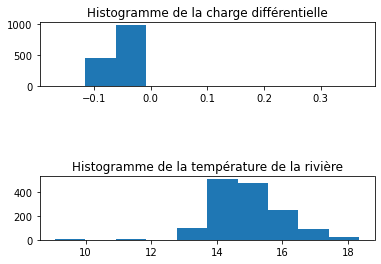

Si la distribution des données est proche d'une gaussienne, nous vous recommandons d'utiliser le score Z. Sinon, utilisez l'écart interquartile


Button(description='Score Z', style=ButtonStyle())

Button(description='Ecart interquartile', style=ButtonStyle())

Faites varier le seuil et visualisez en temps réel les points qui seraient conservés (en vert) et supprimés (en rouge) en appliquant la méthode du score Z avec le seuil courant


interactive(children=(FloatSlider(value=3.0, description='seuil', max=6.0), Output()), _dom_classes=('widget-i…

Button(description='Valider le seuil', style=ButtonStyle())

Voici ci-dessous la boîte à moustache représentant les données nettoyées du capteur rivière


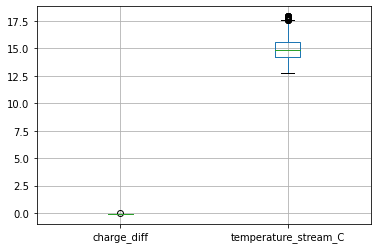

Capteur zone hyporhéique :
Le jeu de données du capteur ZH n'est pas utilisable en l'état


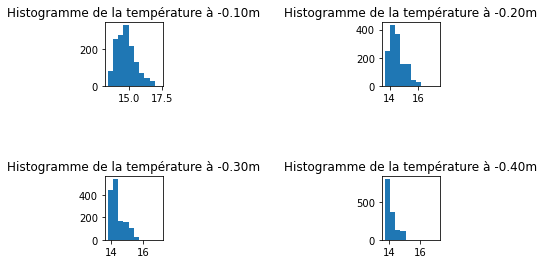

Si la distribution des données est proche d'une gaussienne, nous vous recommandons d'utiliser le score Z. Sinon, utilisez l'écart interquartile


Button(description='Score Z', style=ButtonStyle())

Button(description='Ecart interquartile', style=ButtonStyle())

FloatSlider(value=1.5, description='Coefficient', max=3.0)

Button(description='Valider le coefficient', style=ButtonStyle())

Voici ci-dessous la boîte à moustache représentant les données nettoyées du capteur ZH


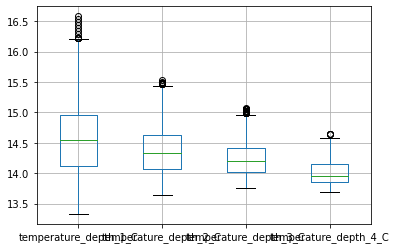

Voici la liste des capteurs défaillants :
Le capteur rivière est défaillant. En effet, les mesures de températures qu'il a enregistrées subissent des variations trop brusques pour que ces données soient conformes à la réalité. Elles atteignent jusqu'à 0.15°C/(15 min)
Le capteur situé à -0.10m est défaillant. En effet, les mesures de températures qu'il a enregistrées subissent des variations trop brusques pour que ces données soient conformes à la réalité. Elles atteignent jusqu'à 0.55°C/(15 min)
Le capteur situé à -0.20m est défaillant. En effet, les mesures de températures qu'il a enregistrées subissent des variations trop brusques pour que ces données soient conformes à la réalité. Elles atteignent jusqu'à 0.1°C/(15 min)
Le capteur situé à -0.30m est défaillant. En effet, les mesures de températures qu'il a enregistrées subissent des variations trop brusques pour que ces données soient conformes à la réalité. Elles atteignent jusqu'à 0.17°C/(15 min)
Orientation des échanges nappe-riv

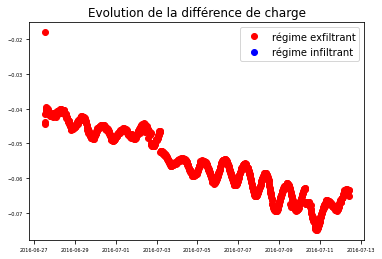

Cohérence entre les données de différence de charge et celles des profils de température:
Les données de différence de charge donnent les mêmes informations que celles du profil de température. En regime infiltratoire, la température suit effectivement les mêmes variations dans la rivière et à toutes les profondeurs de la zone hyporhéique.


In [155]:
traitement_donnees("../documents/molonari/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_info.csv","../documents/molonari/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_P_measures.csv","../documents/molonari/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_T_measures.csv")

# Deux autres jeux de données sont disponibles sur le répertoire github.
Votre rôle est de traiter et d'analyser ces données avec la méthodologie que vous avez développé

Capteur rivière :
Le jeu de données du capteur rivière est utilisable en l'état
Voici ci-dessous la boîte à moustache représentant les données du capteur rivière


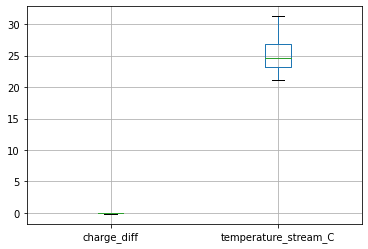

Capteur zone hyporhéique :
Le jeu de données du capteur ZH n'est pas utilisable en l'état


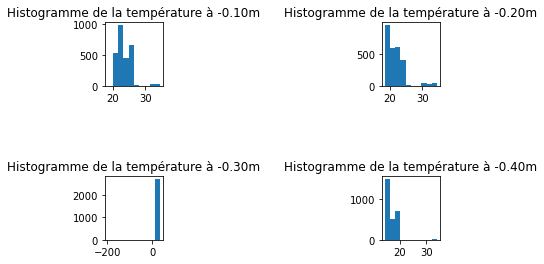

Si la distribution des données est proche d'une gaussienne, nous vous recommandons d'utiliser le score Z. Sinon, utilisez l'écart interquartile


Button(description='Score Z', style=ButtonStyle())

Button(description='Ecart interquartile', style=ButtonStyle())

FloatSlider(value=1.5, description='Coefficient', max=3.0)

Button(description='Valider le coefficient', style=ButtonStyle())

Voici ci-dessous la boîte à moustache représentant les données nettoyées du capteur ZH


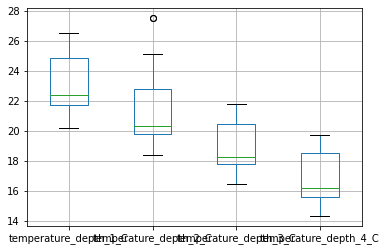

Voici la liste des capteurs défaillants :
Le capteur rivière est défaillant. En effet, les mesures de températures qu'il a enregistrées subissent des variations trop brusques pour que ces données soient conformes à la réalité. Elles atteignent jusqu'à 0.39°C/(15 min)
Le capteur situé à -0.10m est défaillant. En effet, les mesures de températures qu'il a enregistrées subissent des variations trop brusques pour que ces données soient conformes à la réalité. Elles atteignent jusqu'à 0.06°C/(15 min)
Le capteur situé à -0.20m est défaillant. En effet, les mesures de températures qu'il a enregistrées subissent des variations trop brusques pour que ces données soient conformes à la réalité. Elles atteignent jusqu'à 9.0°C/(15 min)
Orientation des échanges nappe-rivière au cours du temps:


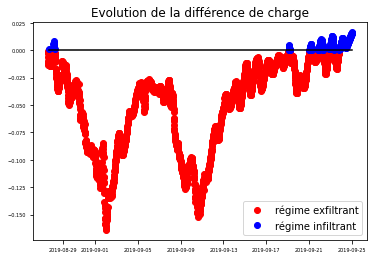

Cohérence entre les données de différence de charge et celles des profils de température:
Les données de différence de charge ne donnent pas les mêmes informations que celles du profil de température. En effet, pendant certaines périodes qui sont des périodes de régime d'infiltration d'après les données de différence de charges, les profils de température ne suivent pas les mêmes variations, ce qui est contradictoire car les variations de température sont censées se propager de la rivière vers la zone hyporhéique en régime infiltratoire.


In [156]:
traitement_donnees("../documents/molonari/MOLONARI_1D_RESOURCES/sampling_points/Point047/point047_info.csv","../documents/molonari/MOLONARI_1D_RESOURCES/sampling_points/Point047/point047_P_measures.csv","../documents/molonari/MOLONARI_1D_RESOURCES/sampling_points/Point047/point047_T_measures.csv")

Capteur rivière :
Le jeu de données du capteur rivière est utilisable en l'état
Voici ci-dessous la boîte à moustache représentant les données du capteur rivière


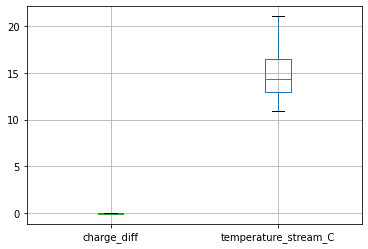

Capteur zone hyporhéique :
Le jeu de données du capteur ZH n'est pas utilisable en l'état


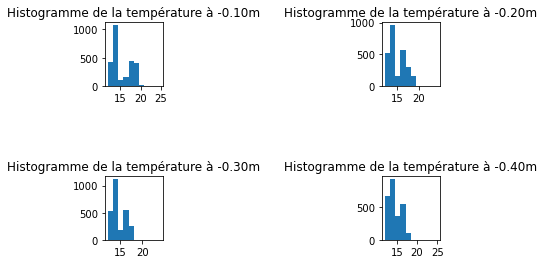

Si la distribution des données est proche d'une gaussienne, nous vous recommandons d'utiliser le score Z. Sinon, utilisez l'écart interquartile


Button(description='Score Z', style=ButtonStyle())

Button(description='Ecart interquartile', style=ButtonStyle())

FloatSlider(value=1.5, description='Coefficient', max=3.0)

Button(description='Valider le coefficient', style=ButtonStyle())

Voici ci-dessous la boîte à moustache représentant les données nettoyées du capteur ZH


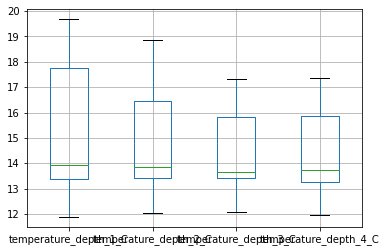

Voici la liste des capteurs défaillants :
Le capteur rivière est défaillant. En effet, les mesures de températures qu'il a enregistrées subissent des variations trop brusques pour que ces données soient conformes à la réalité. Elles atteignent jusqu'à 0.38°C/(15 min)
Le capteur situé à -0.10m est défaillant. En effet, les mesures de températures qu'il a enregistrées subissent des variations trop brusques pour que ces données soient conformes à la réalité. Elles atteignent jusqu'à 0.83°C/(15 min)
Le capteur situé à -0.20m est défaillant. En effet, les mesures de températures qu'il a enregistrées subissent des variations trop brusques pour que ces données soient conformes à la réalité. Elles atteignent jusqu'à 5.01°C/(15 min)
Orientation des échanges nappe-rivière au cours du temps:


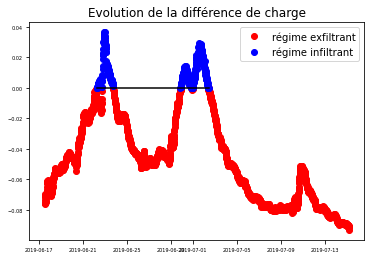

Cohérence entre les données de différence de charge et celles des profils de température:
Les données de différence de charge ne donnent pas les mêmes informations que celles du profil de température. En effet, pendant certaines périodes qui sont des périodes de régime d'infiltration d'après les données de différence de charges, les profils de température ne suivent pas les mêmes variations, ce qui est contradictoire car les variations de température sont censées se propager de la rivière vers la zone hyporhéique en régime infiltratoire.


In [157]:
traitement_donnees("../documents/molonari/MOLONARI_1D_RESOURCES/sampling_points/Point046/point046_info.csv","../documents/molonari/MOLONARI_1D_RESOURCES/sampling_points/Point046/point046_P_measures.csv","../documents/molonari/MOLONARI_1D_RESOURCES/sampling_points/Point046/point046_T_measures.csv")